In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
import numpy as np
import os
import scipy.stats as stats


from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, classification_report
alpha = 0.5

import prepare as p
import model as m
import explore as e
import acquire as a
from env import get_db_url

#turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = a.get_comet_data()

In [3]:
#df.drop(columns=['DT','A1', 'A2', 'A3', 'n_obs_used', 'per_y','condition_code', 'ad'], inplace = True)

In [4]:
#df['tp_cal']=df['tp_cal'].str.split(pat='.').str[0]

In [5]:
#df['tp_cal']=df['tp_cal'].str.split(pat='-').str[0]

In [6]:
#df=df.drop(index=[0,1])

In [7]:
#df['tp_cal'] = df['tp_cal'].astype('int')

In [8]:
#df = pd.get_dummies(df, columns = ['two_body'], drop_first=False)

In [9]:
#df = df.set_index('full_name')

In [10]:
#df.rename({'class': 'orbit'}, axis=1, inplace=True)

In [11]:
#df.head()

In [12]:
#df.info()

In [13]:
#df['orbit'].value_counts()

In [14]:
#df.class_PAR.value_counts()

## Prep Complete

In [15]:
df = p.pre_processing(df)

In [16]:
df.head()

,q,i,om,w,tp_cal,orbit,data_arc,two_body_F,two_body_T
full_name,,,,,,,,,
C/240 V1,0.37,44.0,214.0,82.0,240,PAR,39.0,0,1
C/390 Q1,0.92,36.0,356.0,23.0,390,PAR,26.0,0,1
C/400 F1,0.21,32.0,38.0,47.0,400,PAR,22.0,0,1
C/418 M1,0.35,110.0,310.0,240.0,418,PAR,82.0,0,1
C/442 V1,1.53,106.0,271.0,178.0,442,PAR,100.0,0,1


# Split

In [17]:
train, validate, test = p.split_data(df)

In [18]:
train_X, validate_X, test_X, train_y, validate_y, test_y = p.final_split(df, 'orbit')

# Explore

In [19]:
#cat_vars_list = ['orbit', 'two_body_F', 'two_body_T']
#cont_vars_list = ['e','q','i','om','w','tp_cal','data_arc' ]

<AxesSubplot:>

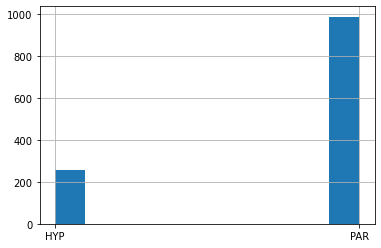

In [20]:
train.orbit.hist()

### Stats Tests

In [35]:

HYP_sample_class = train[train.orbit == 'HYP'].two_body_F
overall_mean_class = train.two_body_F.mean()


In [36]:
t, p = stats.ttest_1samp(HYP_sample_class, overall_mean_class)

print(t, p/2, alpha)

if p/2 > alpha:
    print("We acknowledge there is no relationship")
elif t < 0:
    print("We acknowledge there is no relationship")
else:
    print("We acknowledge there is a relationship")

2.3645678639917223 0.009398915409860676 0.5
We acknowledge there is a relationship
